# P06-3 Processing timestamp

我們可以認得`20210509`或`Sun May 9 10:52:43 2021`或`2021-05-09 10:52:43`是一個時間，但對程式而言，這就是一個字串。
如果我們希望可以從中取出年、月、週、日、Weekday或做時間的運算（例如把時間加一週），然後來觀察時間上的分佈特徵（例如觀察所有貼文在時間軸上的生產力曲線），那就得把這些字串轉為時間型態，而Python的時間型態是`datetime`。

通常就是兩個步驟，分別是`strptime()`和`strftime()`。前者將文字轉為時間物件、後者將時間物件轉為指定的字串格式。而轉換的方法並非程式會自動轉，而是你要告訴程式，你這個字串的格式為何？或者反過來，是告訴程式，你要轉為什麼格式的字串。例如`Sun May 9 10:52:43 2021`如果要正確地轉為時間格式的話，應該是用以下格式轉：
```python
date_string = "Sun May 9 10:52:43 2021"
date_object = datetime.strptime(date_string, "%a %b %d %H:%M:%S %Y")
```
上述程式碼中`%a %b %d %H:%M:%S %Y`是格式字符串，它告訴`strptime`函數如何解釋日期時間字符串中的每個部分。具體來說：
* `%a`：解析星期幾的縮寫（例如 "Sun"）。
* `%b`：解析月份的縮寫（例如 "May"）。
* `%d`：解析日期。
* `%H`：解析小時（24小時制）。
* `%M`：解析分鐘。
* `%S`：解析秒。
* `%Y`：解析完整四位數的年份。

你可以從這個Python Doc的[strftime() and strptime() Behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)這一節找到相關資訊。

## Loading data

Testing picle data download from https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat

In [2]:
# via colab
"""
import pickle
!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)
"""

'\nimport pickle\n!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat\nwith open("pttpost_20210509_n178.dat", "rb") as fin:\n    all_post = pickle.load(fin)\n'

In [3]:
import pickle
with open("../AS/data/pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

### post_df
Processing
1. Convert list-of-dict to dataframe
2. Drop non-trivial-value column `comments`

In [4]:
import pandas as pd
all_post
post_df = pd.DataFrame(all_post).drop(columns=["comments"])
post_df.head()
# comment_df = pd.DataFrame(all_post)[["plink", "comments"]].explode("comments")

,author,authorid,nickname,link,title,timestamp,content
0,s72005ming (QQ),s72005ming,QQ,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,[問卦] 美國會研究因武漢肺炎死亡的人種嗎？,Sun May 9 10:52:43 2021,美國是民族大熔爐\n\n全世界各種人種都有\n\n但是依照各個人種做研究又有歧視的問題\n\...
1,cka (CK),cka,CK,https://www.ptt.cc/bbs/Gossiping/M.1620484638....,Re: [爆卦] 大阪肺炎死亡率超越印度啦！！,Sat May 8 22:37:16 2021,簡單講就是經濟跟死亡二選一的問題\n\n如果你全部的人都關在家不用上班\n經濟停止活動\n是...
2,cpblgu (《善良溫柔》的心愛),cpblgu,《善良溫柔》的心愛,https://www.ptt.cc/bbs/Gossiping/M.1620481036....,Re: [爆卦] 大阪肺炎死亡率超越印度啦！！,Sat May 8 21:37:14 2021,這就是自由過了頭\n\n日本就是太快西化\n\n才犯了西方世界的飮毒\n\n\n要是日本還遺...
3,Dumbbbb (ㄏㄏ),Dumbbbb,ㄏㄏ,https://www.ptt.cc/bbs/Gossiping/M.1620479086....,[爆卦] 大阪肺炎死亡率超越印度啦！！,Sat May 8 21:04:44 2021,先附上新聞aign=none\n\n根據數據統計\n\n大阪1百萬人/19.6人死亡\n印度...
4,leoyuan (糜爛生活該結束了),leoyuan,糜爛生活該結束了,https://www.ptt.cc/bbs/Gossiping/M.1620478128....,Re: [爆卦] 昨天武漢肺炎AZ疫苗將近萬人施打,Sat May 8 20:48:46 2021,想居家檢疫後來去打疫苗，想說大家都不打那別浪費了。\n\n結果台北馬偕預約全滿，其他醫院隨便...


### comment_df
Processing
1. Select `link` and `comments` columns
2. Explode `comments` (a list-of-dict), remember to `reset_index()`
3. Normalize `comments` (a dict)'s key-value pairs to dataframe columns
4. Drop column `comments` 
5. Drop duplicated rows if exists.

In [5]:
selected = pd.DataFrame(all_post)[["link", "comments"]]
selected['comments'][0]

[{'tag': '推 ',
  'userid': 'shiriri',
  'content': ': 有很多了 黑人跟拉丁裔比較高 亞裔跟白人差不多',
  'timestamp': ' 05/09 10:59\n'},
 {'tag': '→ ',
  'userid': 'HELLDIVER',
  'content': ': 有趣的是 剛開始大爆發時 還說亞洲人比較會得武漢病毒',
  'timestamp': ' 05/09 11:01\n'},
 {'tag': '噓 ',
  'userid': 'redsa12',
  'content': ': 網路即時數據就都有按人種按年齡區分的數據了...',
  'timestamp': ' 05/09 11:06\n'},
 {'tag': '→ ',
  'userid': 'redsa12',
  'content': ': 問之前先估狗好嗎 加油好嗎',
  'timestamp': ' 05/09 11:06\n'}]

In [16]:
exploded = selected.explode("comments").reset_index()
print(f"Dataframe shape: {exploded.shape}")
exploded.head()

Dataframe shape: (6587, 3)


,index,link,comments
0,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,"{'tag': '推 ', 'userid': 'shiriri', 'content': ..."
1,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,"{'tag': '→ ', 'userid': 'HELLDIVER', 'content'..."
2,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,"{'tag': '噓 ', 'userid': 'redsa12', 'content': ..."
3,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,"{'tag': '→ ', 'userid': 'redsa12', 'content': ..."
4,1,https://www.ptt.cc/bbs/Gossiping/M.1620484638....,"{'tag': '推 ', 'userid': 'eddisontw', 'content'..."


In [7]:
exploded['comments'][0]
comment_df = exploded.join(pd.json_normalize(exploded['comments']))
comment_df.drop(columns=["comments"], inplace=True)
comment_df.head()

,index,link,tag,userid,content,timestamp
0,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,推,shiriri,: 有很多了 黑人跟拉丁裔比較高 亞裔跟白人差不多,05/09 10:59\n
1,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,→,HELLDIVER,: 有趣的是 剛開始大爆發時 還說亞洲人比較會得武漢病毒,05/09 11:01\n
2,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,噓,redsa12,: 網路即時數據就都有按人種按年齡區分的數據了...,05/09 11:06\n
3,0,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,→,redsa12,: 問之前先估狗好嗎 加油好嗎,05/09 11:06\n
4,1,https://www.ptt.cc/bbs/Gossiping/M.1620484638....,推,eddisontw,: 日本傳統文化裏面 老人等於不值錢垃圾 揹去山上丟掉的,05/08 22:39\n


In [8]:
comment_df.drop_duplicates(inplace=True)
comment_df.shape

(6585, 6)

## Convert timestamp

In [17]:
post_df['timestamp'] = pd.to_datetime(post_df['timestamp'], format='%a %b %d %H:%M:%S %Y')
display(post_df.dtypes)
post_df.head()


author                 object
authorid               object
nickname               object
link                   object
title                  object
timestamp      datetime64[ns]
content                object
year                    int64
month                   int64
weekday                object
num_weekday             int64
dtype: object

,author,authorid,nickname,link,title,timestamp,content,year,month,weekday,num_weekday
0,s72005ming (QQ),s72005ming,QQ,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,[問卦] 美國會研究因武漢肺炎死亡的人種嗎？,2021-05-09 10:52:43,美國是民族大熔爐\n\n全世界各種人種都有\n\n但是依照各個人種做研究又有歧視的問題\n\...,2021,5,Sunday,7
1,cka (CK),cka,CK,https://www.ptt.cc/bbs/Gossiping/M.1620484638....,Re: [爆卦] 大阪肺炎死亡率超越印度啦！！,2021-05-08 22:37:16,簡單講就是經濟跟死亡二選一的問題\n\n如果你全部的人都關在家不用上班\n經濟停止活動\n是...,2021,5,Saturday,6
2,cpblgu (《善良溫柔》的心愛),cpblgu,《善良溫柔》的心愛,https://www.ptt.cc/bbs/Gossiping/M.1620481036....,Re: [爆卦] 大阪肺炎死亡率超越印度啦！！,2021-05-08 21:37:14,這就是自由過了頭\n\n日本就是太快西化\n\n才犯了西方世界的飮毒\n\n\n要是日本還遺...,2021,5,Saturday,6
3,Dumbbbb (ㄏㄏ),Dumbbbb,ㄏㄏ,https://www.ptt.cc/bbs/Gossiping/M.1620479086....,[爆卦] 大阪肺炎死亡率超越印度啦！！,2021-05-08 21:04:44,先附上新聞aign=none\n\n根據數據統計\n\n大阪1百萬人/19.6人死亡\n印度...,2021,5,Saturday,6
4,leoyuan (糜爛生活該結束了),leoyuan,糜爛生活該結束了,https://www.ptt.cc/bbs/Gossiping/M.1620478128....,Re: [爆卦] 昨天武漢肺炎AZ疫苗將近萬人施打,2021-05-08 20:48:46,想居家檢疫後來去打疫苗，想說大家都不打那別浪費了。\n\n結果台北馬偕預約全滿，其他醫院隨便...,2021,5,Saturday,6


## Retrieve time features

In [20]:
post_df['year'] = post_df['timestamp'].dt.year
post_df['month'] = post_df['timestamp'].dt.month
post_df['weekday'] = post_df['timestamp'].dt.strftime('%A')
post_df['num_weekday'] = post_df['timestamp'].dt.weekday + 1

post_df.head()


,author,authorid,nickname,link,title,timestamp,content,year,month,weekday,num_weekday
0,s72005ming (QQ),s72005ming,QQ,https://www.ptt.cc/bbs/Gossiping/M.1620528765....,[問卦] 美國會研究因武漢肺炎死亡的人種嗎？,2021-05-09 10:52:43,美國是民族大熔爐\n\n全世界各種人種都有\n\n但是依照各個人種做研究又有歧視的問題\n\...,2021,5,Sunday,7
1,cka (CK),cka,CK,https://www.ptt.cc/bbs/Gossiping/M.1620484638....,Re: [爆卦] 大阪肺炎死亡率超越印度啦！！,2021-05-08 22:37:16,簡單講就是經濟跟死亡二選一的問題\n\n如果你全部的人都關在家不用上班\n經濟停止活動\n是...,2021,5,Saturday,6
2,cpblgu (《善良溫柔》的心愛),cpblgu,《善良溫柔》的心愛,https://www.ptt.cc/bbs/Gossiping/M.1620481036....,Re: [爆卦] 大阪肺炎死亡率超越印度啦！！,2021-05-08 21:37:14,這就是自由過了頭\n\n日本就是太快西化\n\n才犯了西方世界的飮毒\n\n\n要是日本還遺...,2021,5,Saturday,6
3,Dumbbbb (ㄏㄏ),Dumbbbb,ㄏㄏ,https://www.ptt.cc/bbs/Gossiping/M.1620479086....,[爆卦] 大阪肺炎死亡率超越印度啦！！,2021-05-08 21:04:44,先附上新聞aign=none\n\n根據數據統計\n\n大阪1百萬人/19.6人死亡\n印度...,2021,5,Saturday,6
4,leoyuan (糜爛生活該結束了),leoyuan,糜爛生活該結束了,https://www.ptt.cc/bbs/Gossiping/M.1620478128....,Re: [爆卦] 昨天武漢肺炎AZ疫苗將近萬人施打,2021-05-08 20:48:46,想居家檢疫後來去打疫苗，想說大家都不打那別浪費了。\n\n結果台北馬偕預約全滿，其他醫院隨便...,2021,5,Saturday,6


## Plot timeline

In [22]:
# 按月份分組帖子的數量
post_df.groupby(post_df['timestamp'].dt.to_period("W")).size()
post_df.groupby(post_df['timestamp'].dt.to_period("M")).size()
post_df.groupby(post_df['timestamp'].dt.to_period("D")).size()

timestamp
2021-03-09     6
2021-03-11     1
2021-03-13     2
2021-03-14    10
2021-03-16     1
2021-03-17     2
2021-03-19     1
2021-03-20     1
2021-03-21     1
2021-03-22     3
2021-03-24     6
2021-03-25     2
2021-03-26     1
2021-03-29     1
2021-03-30     4
2021-03-31     4
2021-04-01     2
2021-04-02     4
2021-04-03     1
2021-04-04     1
2021-04-07     2
2021-04-10     1
2021-04-11     1
2021-04-12     2
2021-04-13     2
2021-04-14     4
2021-04-16     3
2021-04-17     2
2021-04-18     2
2021-04-19     5
2021-04-20     8
2021-04-21     1
2021-04-22     3
2021-04-24     5
2021-04-25     3
2021-04-26     4
2021-04-27    13
2021-04-28     8
2021-04-29     4
2021-04-30     4
2021-05-01     5
2021-05-02     7
2021-05-03    12
2021-05-04     1
2021-05-05     7
2021-05-06     3
2021-05-07     3
2021-05-08     8
2021-05-09     1
Freq: D, dtype: int64

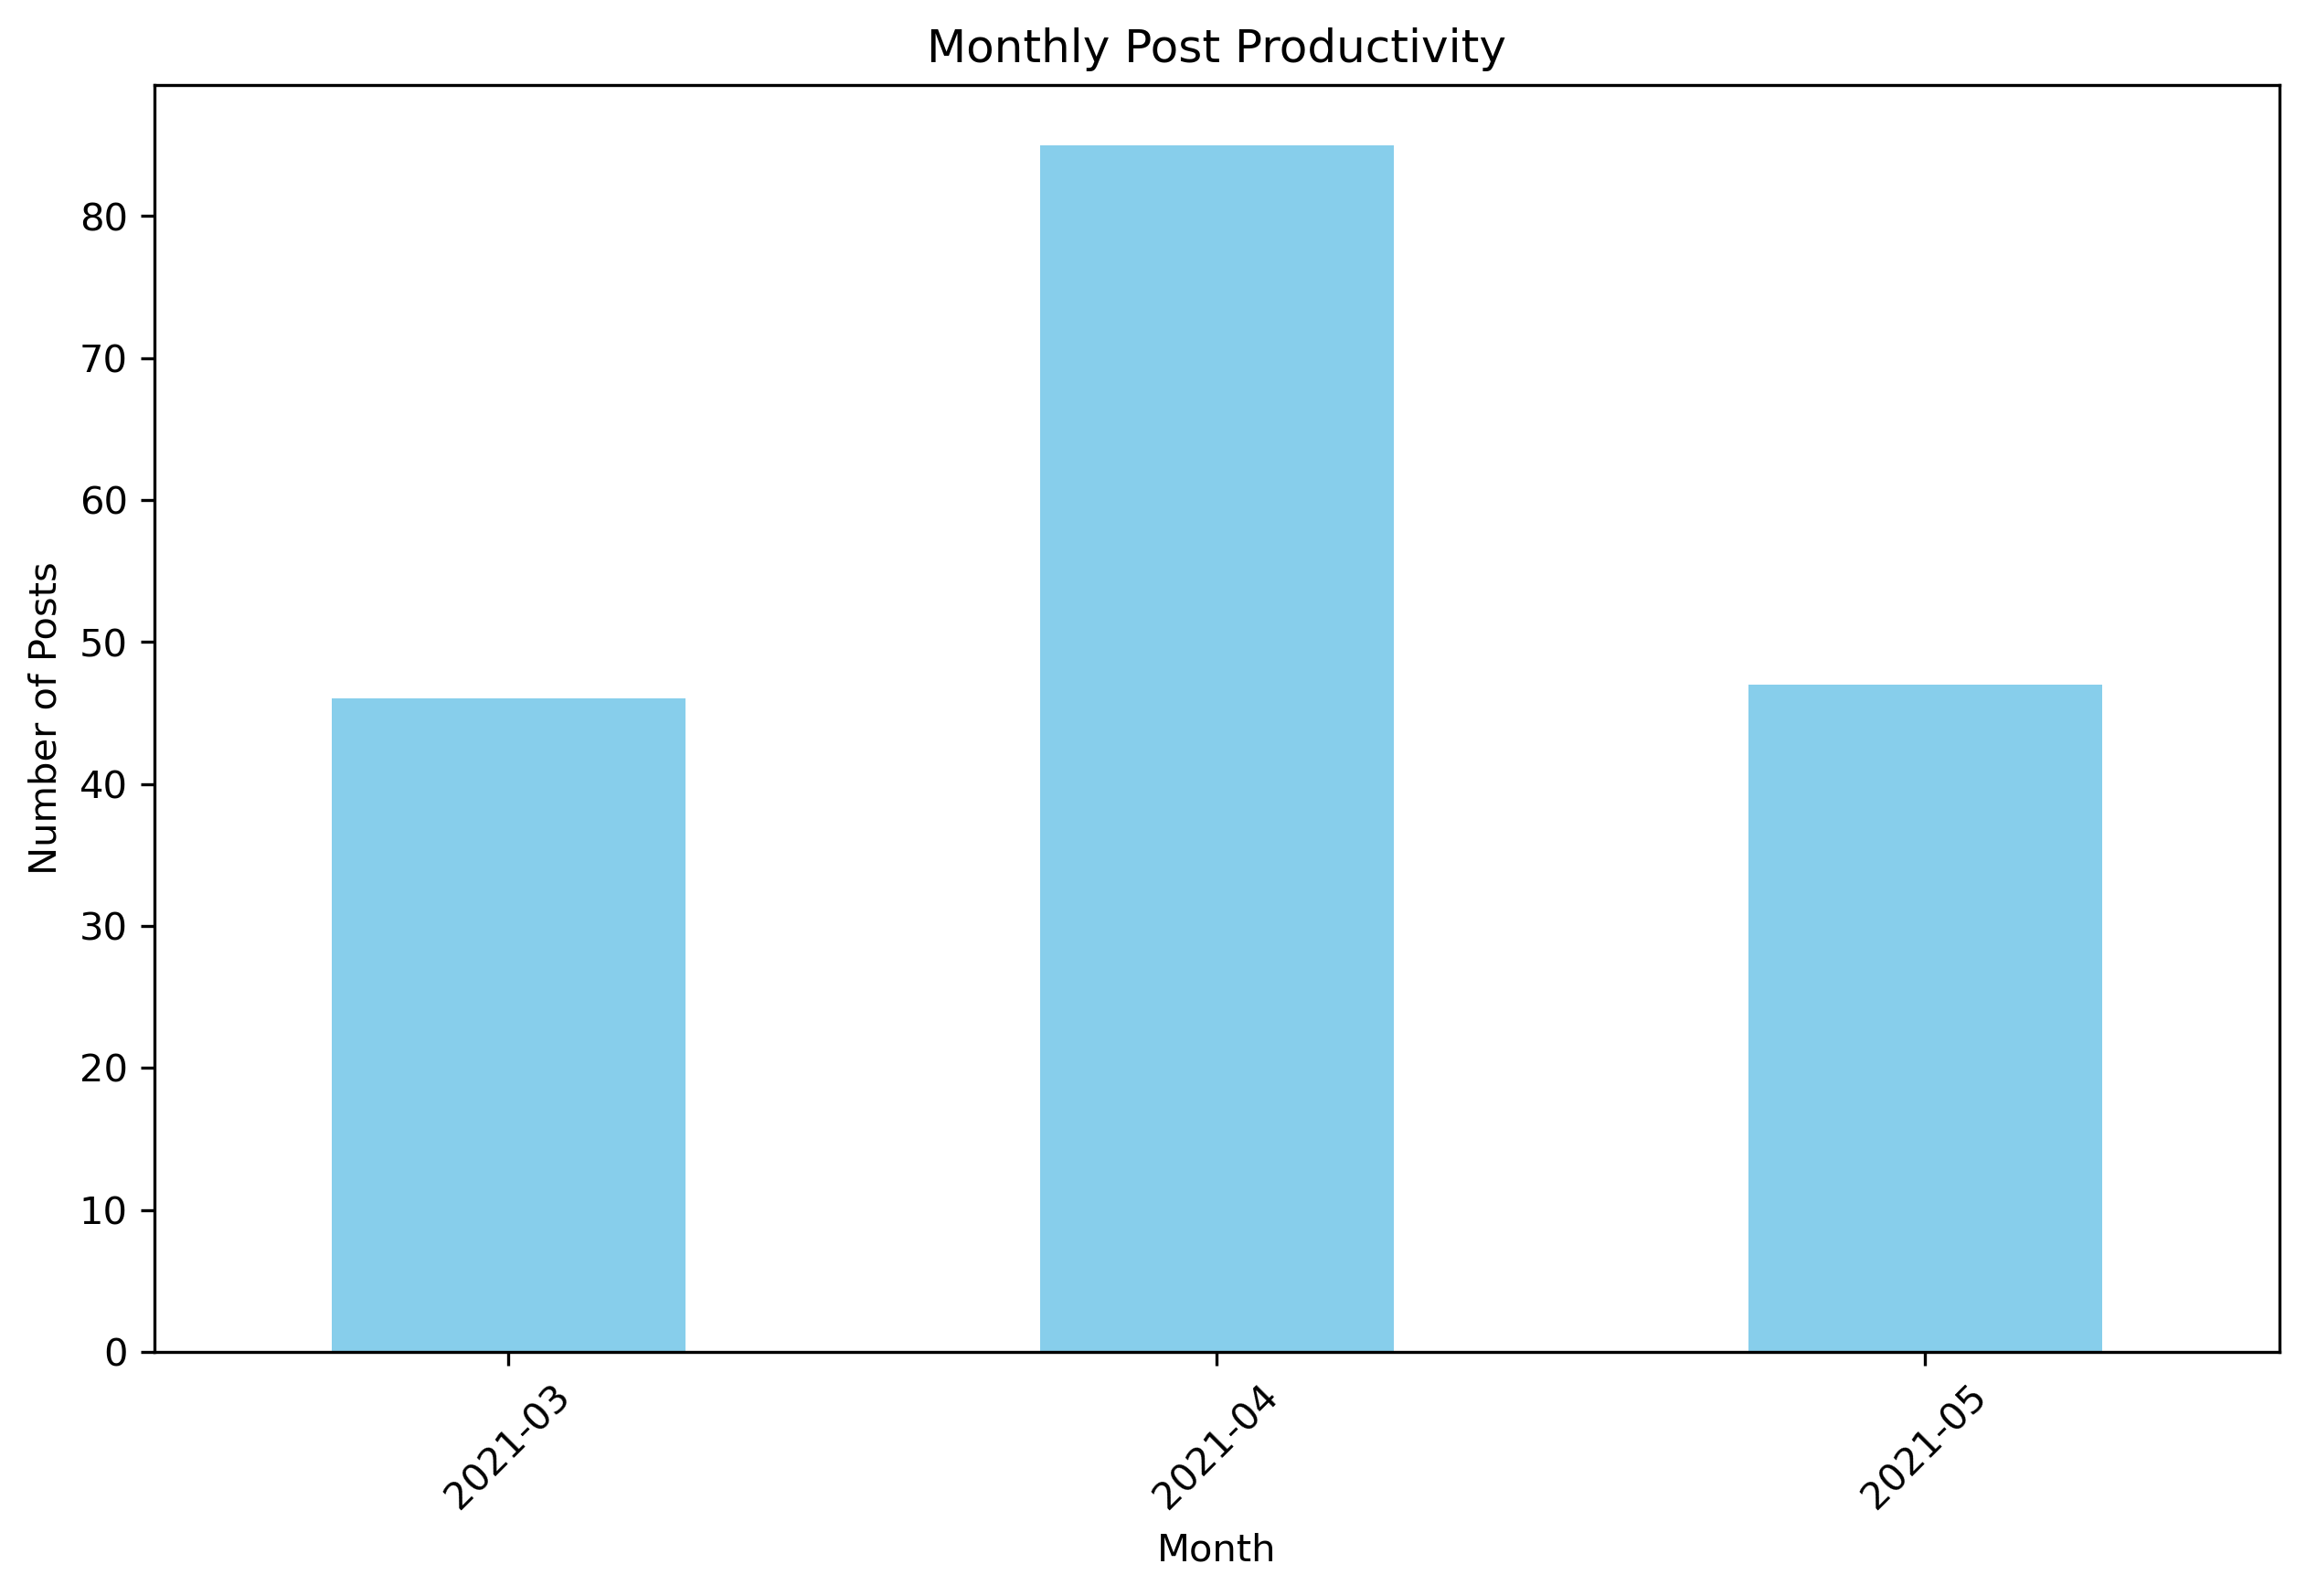

In [30]:
import matplotlib.pyplot as plt
monthly_posts = post_df.groupby(post_df['timestamp'].dt.to_period("M")).size()

# 繪製條形圖
plt.figure(figsize=(10, 6), dpi=300)
monthly_posts.plot(kind='bar', color='skyblue')
plt.title('Monthly Post Productivity')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

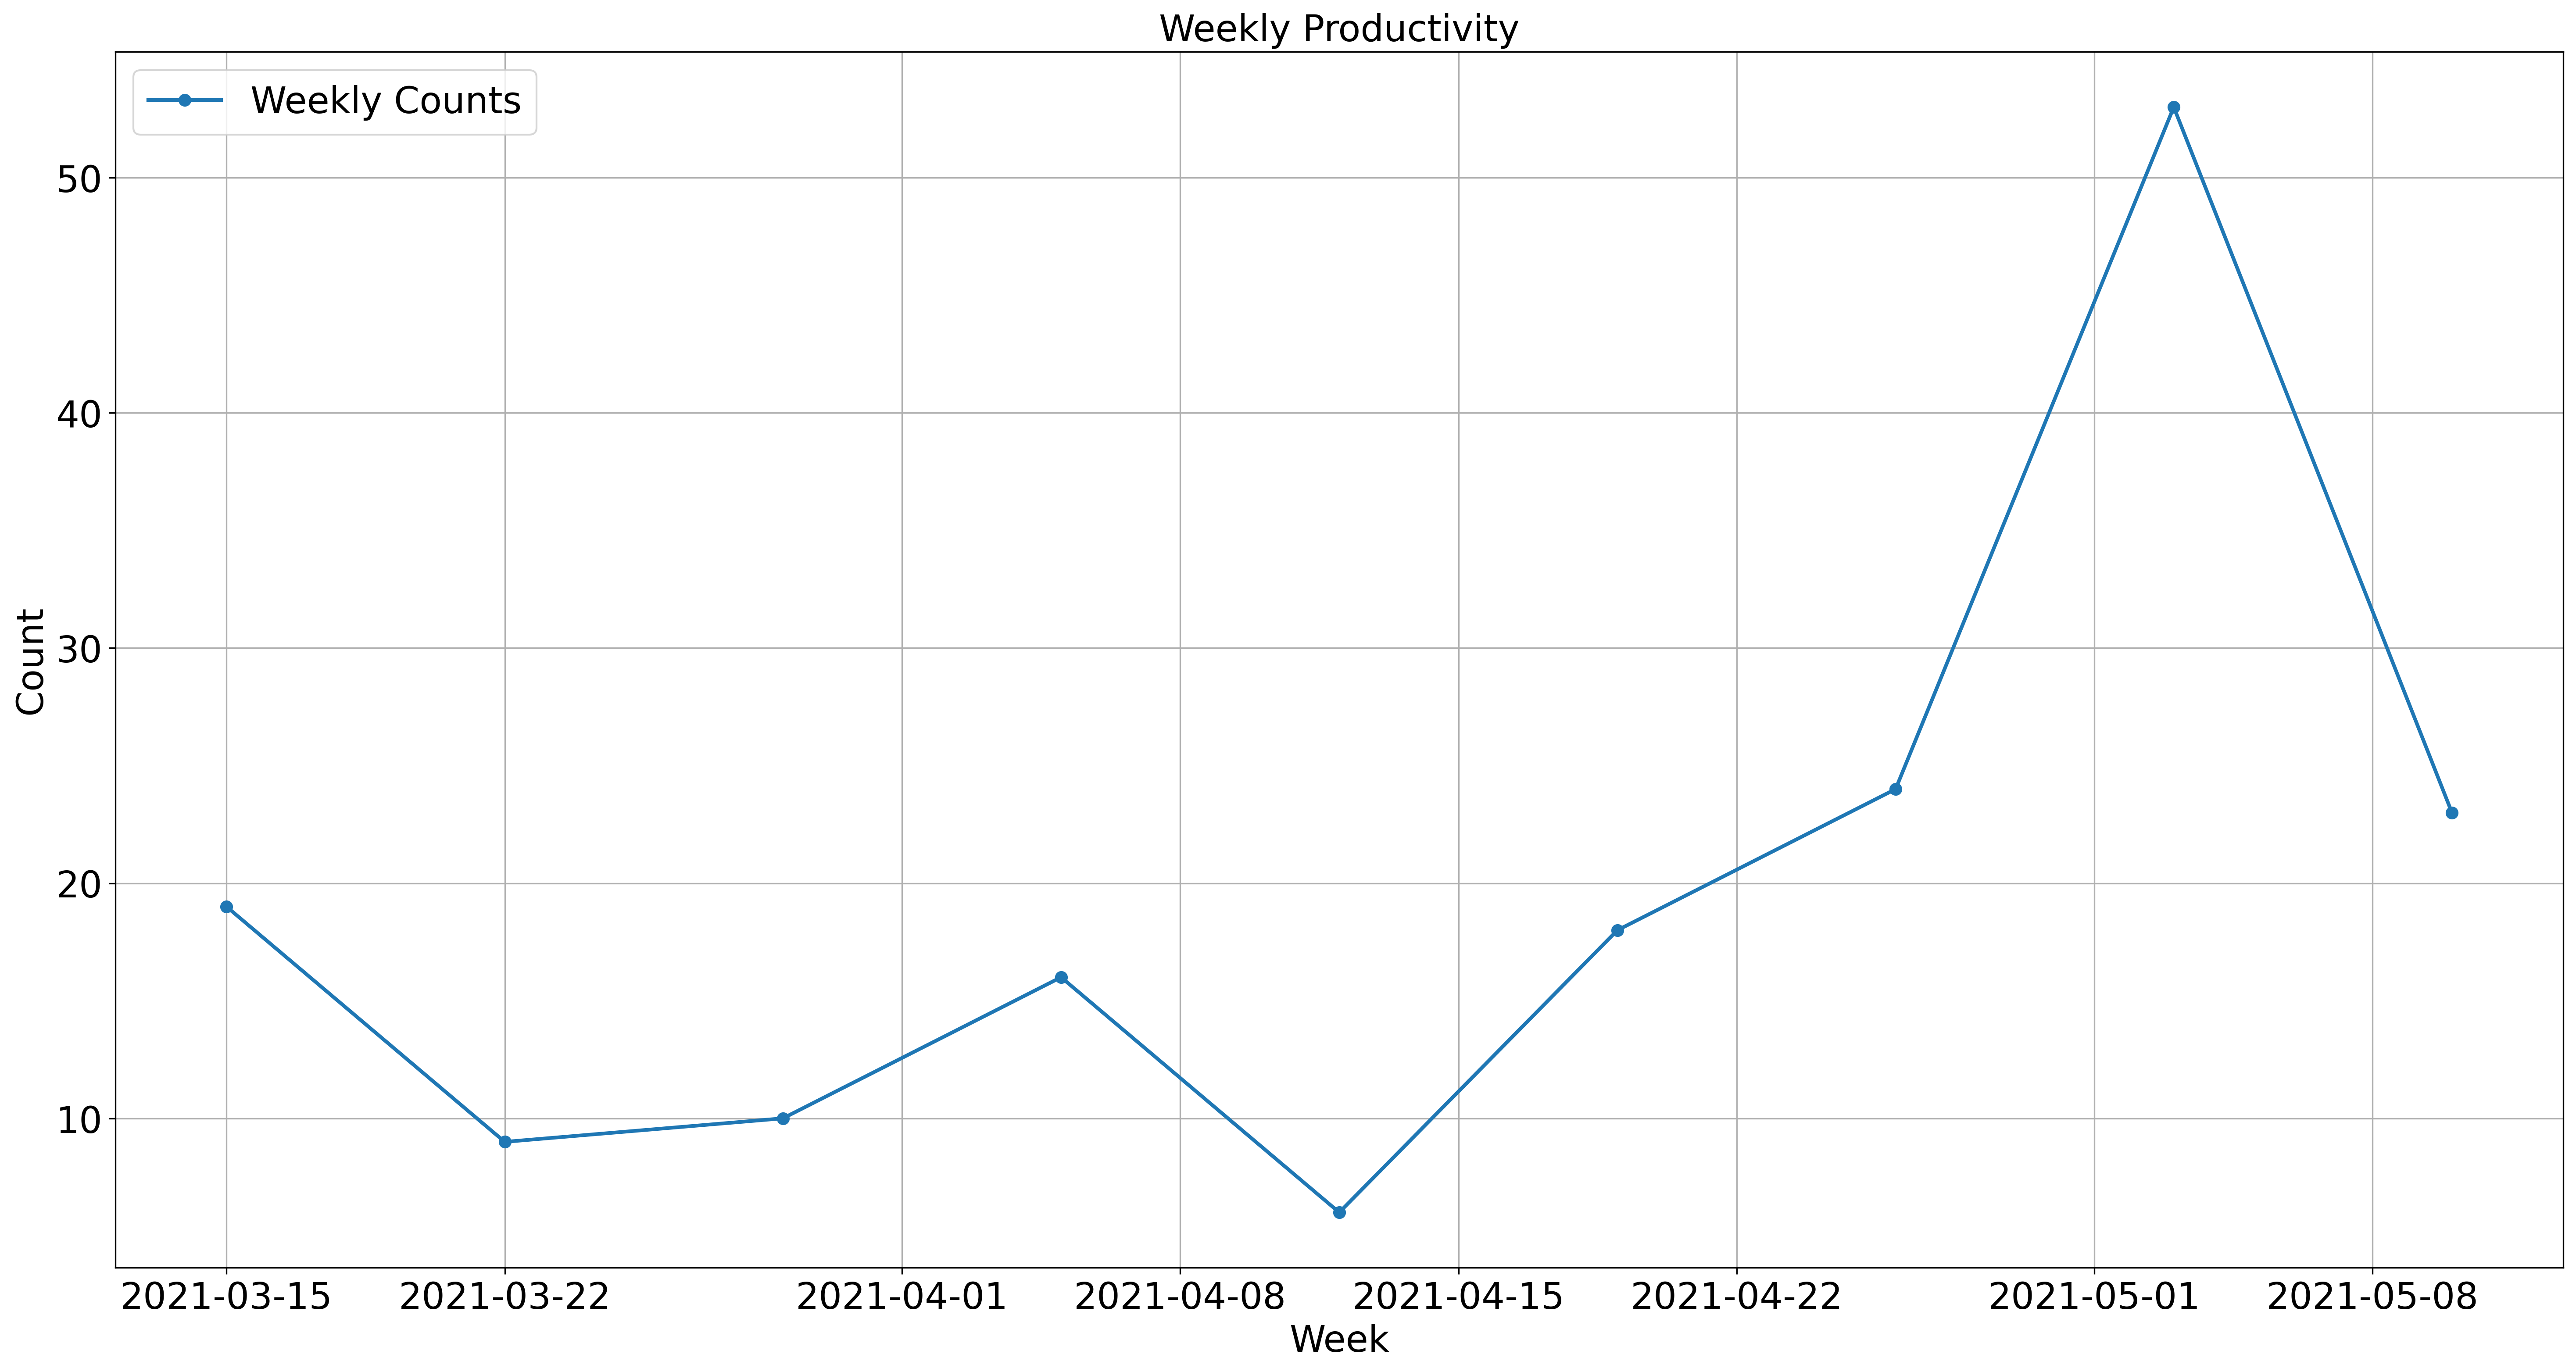

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'ptime' column in datetime format
# If 'ptime' is not in datetime format, convert it first using pd.to_datetime()

# Group the data by week and count occurrences
weekly_counts1 = post_df.groupby(pd.Grouper(key='timestamp', freq='W-MON')).size()

# Create a time series plot for the weekly counts
plt.figure(figsize=(24, 12), dpi=300)
plt.plot(weekly_counts1.index, weekly_counts1.values, marker='o', linestyle='-', linewidth = 2, label='Weekly Counts')
plt.xlabel('Week', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
plt.title('Weekly Productivity', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
